# importing Libraries

In [1]:
#basic
import pandas as pd
import numpy as np

#matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#set maximum columns and rows
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

#plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

#time
import time

#statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor   

#model selection
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict #prediction
from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import GridSearchCV

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#pca
from sklearn.decomposition import PCA

#preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Knn imputer
# from sklearn.impute import KNNImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#warnings
import warnings as warnings
warnings.filterwarnings("ignore")

# Reading the CSV file 

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

# Data Preprocessing 

In [4]:
df['month'].value_counts().index

Index(['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec'], dtype='object')

In [5]:
df['month']=df['month'].replace({'may':3, 'jul':5, 'aug':6, 'jun':4, 'nov':9, 'apr':2, 'oct':8, 'sep':7, 'mar':1, 'dec':10})

# DAY OF WEEK

In [6]:
df['day_of_week'].value_counts().index

Index(['thu', 'mon', 'wed', 'tue', 'fri'], dtype='object')

In [7]:
df['day_of_week']=df['day_of_week'].replace({'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5})

In [8]:
df_final=pd.get_dummies(data=df,columns=['job','marital','education','default','housing','loan','poutcome'],drop_first=True)

# TARGET

In [9]:
df_final['y'].replace({'no':0,'yes':1},inplace=True)

# CONTACT

In [10]:
df_final['contact'].replace({'cellular':1,'telephone':0},inplace=True)

## DROPPING "PDAYS" FEATURE BECAUSE PDAYS IS ZERO THE OUTCOME Y IS ALSO ZERO

In [11]:
df.drop('pdays',axis=1,inplace=True)

# Removing outlier Using Isolation forest

### Isolation Forest is similar in principle to Random Forest and is built on the basis of decision trees. Isolation Forest, however, identifies anomalies or outliers rather than profiling normal data points. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that selected feature. This split depends on how long it takes to separate the points.

### Random partitioning produces noticeably shorter paths for anomalies. When a forest of random trees collectively produces shorter path lengths for particular samples, they are highly likely to be anomalies.

In [12]:
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)

iso_forest = iso_forest.fit(df_final)

In [13]:
isof_outliers = iso_forest.predict(df_final)

In [14]:
isoF_outliers_values = df_final[iso_forest.predict(df_final) == -1]

## Anomalies in the Dataset

In [17]:
isoF_outliers_values

age  contact  month  day_of_week  duration  campaign  pdays  previous  \
29      55        0      3            1       362         1    999         0   
261     27        0      3            1       119         1    999         0   
385     59        0      3            2       437         1    999         0   
388     28        0      3            2      1201         1    999         0   
401     48        0      3            2       152         1    999         0   
...    ...      ...    ...          ...       ...       ...    ...       ...   
41179   64        1      9            5       151         3    999         0   
41182   29        1      9            5       112         1      9         1   
41183   73        1      9            5       334         1    999         0   
41186   44        1      9            5       442         1    999         0   
41187   74        1      9            5       239         3    999         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
29              1.1          93.994          -36.4      4.857       5191.0  0   
261             1.1          93.994          -36.4      4.857       5191.0  0   
385             1.1          93.994          -36.4      4.857       5191.0  0   
388             1.1          93.994          -36.4      4.857       5191.0  1   
401             1.1          93.994          -36.4      4.857       5191.0  0   
...             ...             ...            ...        ...          ... ..   
41179          -1.1          94.767          -50.8      1.028       4963.6  0   
41182          -1.1          94.767          -50.8      1.028       4963.6  0   
41183          -1.1          94.767          -50.8      1.028       4963.6  1   
41186          -1.1          94.767          -50.8      1.028       4963.6  1   
41187          -1.1          94.767          -50.8      1.028       4963.6  0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
29                   0                 0              0               0   
261                  1                 0              0               0   
385                  0                 0              0               1   
388                  0                 0              0               0   
401                  0                 0              0               0   
...                ...               ...            ...             ...   
41179                0                 0              0               0   
41182                0                 0              0               0   
41183                0                 0              0               0   
41186                0                 0              0               0   
41187                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
29               0                  0             0            0   
261              0                  0             0            0   
385              0                  0             0            0   
388              0                  0             0            0   
401              0                  0             1            0   
...            ...                ...           ...          ...   
41179            1                  0             0            0   
41182            0                  0             0            0   
41183            1                  0             0            0   
41186            0                  0             0            0   
41187            1                  0             0            0   

       job_technician  job_unemployed  job_unknown  marital_married  \
29                  0               0            1                1   
261                 0               0            0                0   
385                 0               0            0                1   
388                 0               0            1                0   


# Dropping the anomalies

In [15]:
df_final_1=df_final.drop(isoF_outliers_values.index.values.tolist())

# Base Machine learning models (UnBalanced Dataset)

### SCALING FEATURES BEFORE BUILDING THE MODEL

In [16]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

# FUNCTION TO PLOT ROC_AUC CURVE

In [17]:
def plot_roc_curve(fper, tper,roc_auc):  
    plt.plot(fper, tper, color='orange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
result_0=(y_Train.value_counts()[0]/len(y_Train))*100
result_1=(y_Train.value_counts()[1]/len(y_Train))*100

# DataSet imbalance 

In [19]:
labels = ['0-no','1-yes']
values = [result_0,result_1]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

# model results function 

In [20]:
def model_results(X,y,performCV=True,visual=True,cv_folds=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy',random_state=42),
    DecisionTreeClassifier(criterion='gini',random_state=42),
    RandomForestClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
    ]
    
    results = []
    accuracy_train=[]
    accuracy_test=[]
    precision=[]
    f1_s=[]
    roc_ac_score=[]
    recall=[]
    
    for item in classifiers:
        print(item,"\n")
        clf = item
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        #METRICS
        #train
        print("accuracy train:",clf.score(X_train,y_train),"\n")
        #test
        print("accuracy test:",clf.score(X_test,y_test),"\n")
        #precision
        print("precision :",precision_score(y_test,y_pred),"\n")
        #f1-score
        print("f1 score:",f1_score(y_test,y_pred),"\n")
        #ROC-AUC
        print("roc_auc_score",roc_auc_score(y_test,y_pred),"\n")
        
        #Append values
        accuracy_train.append(clf.score(X_train,y_train))
        accuracy_test.append(clf.score(X_test,y_test))
        precision.append(precision_score(y_test,y_pred))
        recall.append(recall_score(y_test,y_pred))
        f1_s.append(f1_score(y_test,y_pred))
        roc_ac_score.append(roc_auc_score(y_test,y_pred))
        
        #CONFUSION MATRIX
        fig,ax= plt.subplots()
        fig.set_size_inches(4, 4)
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap = 'RdBu_r')
        bottom, top = ax.get_ylim()
        ax.set_xlabel("predicted")
        ax.set_ylabel("Actual")
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.show()
        #roc auc curve
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plot_roc_curve(fpr, tpr,roc_auc)
        print("-------------------------------------------------------------------------------------------------------")
#--------------------------------------------------------------------------------------------------------------------------
    #train-test visualisation:
    models_TT=['LOGISTIC REGRESSION','KNN','NAVIES BAYES','DECISION TREE ENTROPY','DECISION TREE GINI','RANDOM FOREST'
        ,'BAGGING CLASSIFIER','ADABOOST CLASSIFIER','GRADIENTBOOST CLASSIFIER']
    if visual:
        result_scores=pd.DataFrame({'NAME':models_TT,'accuracy_train':accuracy_train,'accuracy_test':accuracy_test,'precision':precision,'Recall':recall,'roc_ac':roc_ac_score,'f1-score':f1_s})
        result_scores=result_scores.round(decimals=2)
        print(result_scores)

        fig = go.Figure(data=[
        go.Bar(name='Train Accuracy', x=models_TT, y=result_scores.accuracy_train,text=result_scores.accuracy_train,textposition='auto'),
        go.Bar(name='Test Accuracy', x=models_TT, y=result_scores.accuracy_test,text=result_scores.accuracy_test,textposition='auto')
        ])
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()
#--------------------------------------------------------------------------------------------------------------------------    
    if performCV:
        print("cross validation scores")   
        #CROSS-VALIDATION
        models=[]
        models.append(('LR', LogisticRegression(random_state=42)))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART1', DecisionTreeClassifier(criterion='entropy',random_state=42)))
        models.append(('CART2', DecisionTreeClassifier(criterion='gini',random_state=42)))
        models.append(('NB', GaussianNB()))
        models.append(('RF', RandomForestClassifier(random_state=42)))
        models.append(('BGC', BaggingClassifier(random_state=42)))
        models.append(('ABC', AdaBoostClassifier(random_state=42)))
        models.append(('GBC', GradientBoostingClassifier(random_state=42)))


        results_cross = []
        accuracy_cross=[]
        names_cross = []
        bias=[]
        variance=[]
        for name,model in models:
            kf  = model_selection.KFold(shuffle=True,n_splits=cv_folds,random_state=0)
            cv_results =model_selection.cross_val_score(model,X,y,cv=kf,scoring='roc_auc')
            #print(cv_results)
            results_cross.append(cv_results)
            names_cross.append(name)
            bias.append(1-np.mean(cv_results))
            variance.append(np.var(cv_results,ddof=1))
            accuracy_cross.append(np.mean(cv_results))
            #print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
            print()
            print('ACCURACY SCORE:',name,':',np.mean(cv_results))
            print('BIAS ERROR OF',name,':',1-np.mean(cv_results))
            print('VARIANCE ERROR OF',name,':',np.var(cv_results,ddof=1))
            print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_results),np.std(cv_results),np.min(cv_results),np.max(cv_results)))
            print('------------------------------------------------------------------------------------------------------------')
        
#--------------------------------------------------------------------------------------------------------------------------    
    #cross validation visulation:
    if performCV:
        if visual:
            result_scores1=pd.DataFrame({'NAME':models_TT,'Accuracy':accuracy_cross,'BIAS_ERROR':bias,'VARIANCE_ERROR':variance})
            print(result_scores1)

            result_scores1=result_scores1.round(decimals=2)
            fig = go.Figure(data=[
            go.Bar(name='Accuracy', x=result_scores1.NAME, y=result_scores1.Accuracy,text=result_scores1.Accuracy,textposition='auto'),
            go.Bar(name='Bias Error', x=result_scores1.NAME, y=result_scores1.BIAS_ERROR,text=result_scores1.BIAS_ERROR,textposition='auto')
            ])
            # Change the bar mode
            fig.update_layout(barmode='group')
            fig.show()     

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.9327115770001542 

accuracy test: 0.9322003416958906 

precision : 0.5709342560553633 

f1 score: 0.3044280442804428 

roc_auc_score 0.5977693238171459 



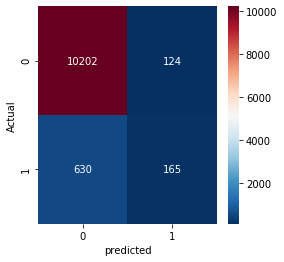

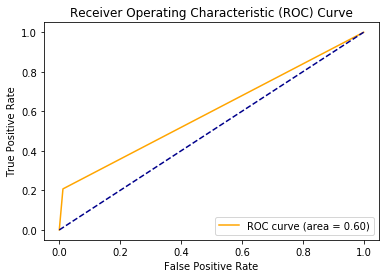

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.9423462309233852 

accuracy test: 0.9281539429907383 

precision : 0.4937106918238994 

f1 score: 0.28212039532794253 

roc_auc_score 0.5909462832417893 



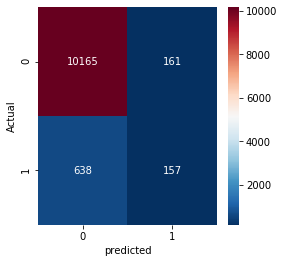

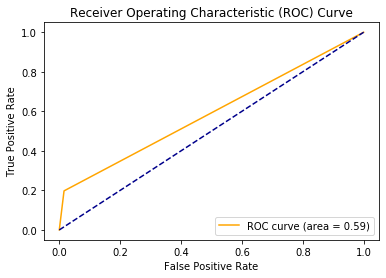

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.08262679204562973 

accuracy test: 0.08326589335491413 

precision : 0.07233848953594177 

f1 score: 0.13491726771319473 

roc_auc_score 0.5063432113112531 



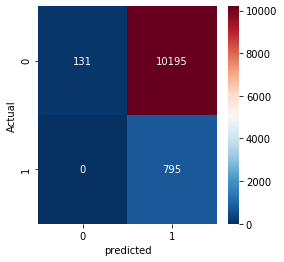

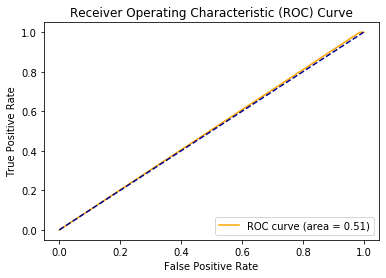

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9129574678536103 

precision : 0.3995354239256678 

f1 score: 0.4154589371980677 

roc_auc_score 0.6913183062355878 



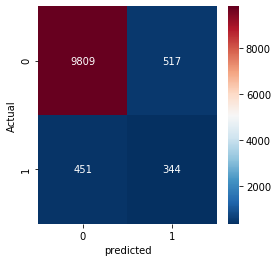

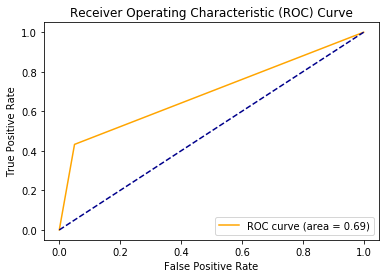

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9133171477385127 

precision : 0.40364880273660203 

f1 score: 0.423444976076555 

roc_auc_score 0.6973170856493409 



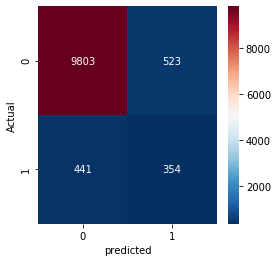

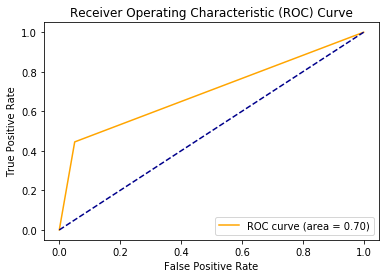

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.9935255125635887 

accuracy test: 0.9319305817822139 

precision : 0.5492227979274611 

f1 score: 0.35901778154106695 

roc_auc_score 0.6249079992252566 



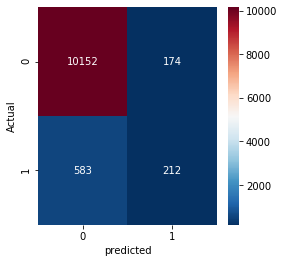

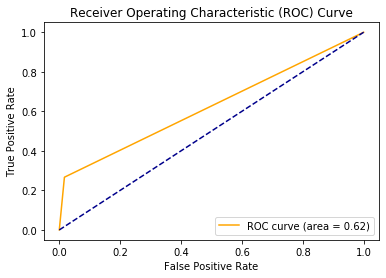

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9940650531832896 

accuracy test: 0.930042262386476 

precision : 0.5167652859960552 

f1 score: 0.402457757296467 

roc_auc_score 0.6529166164179813 



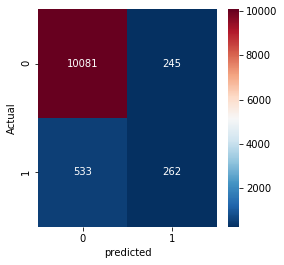

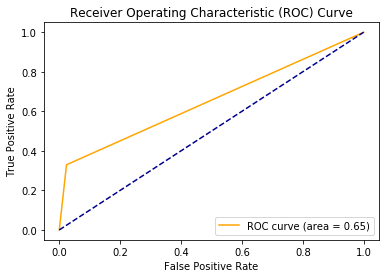

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.9324803453059967 

accuracy test: 0.9296825825015737 

precision : 0.5178082191780822 

f1 score: 0.3258620689655173 

roc_auc_score 0.6103457474994427 



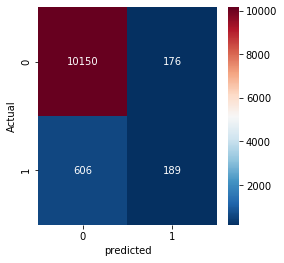

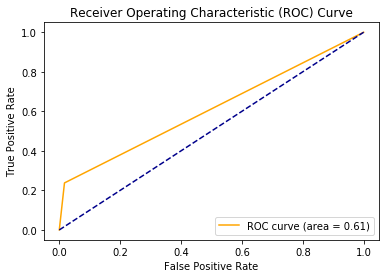

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.9427701556960074 

accuracy test: 0.9361568204298175 

precision : 0.5959367945823928 

f1 score: 0.42649434571890144 

roc_auc_score 0.6573702944390236 



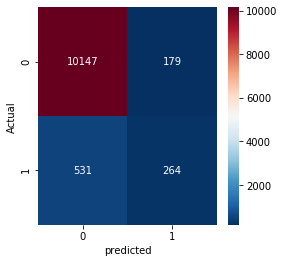

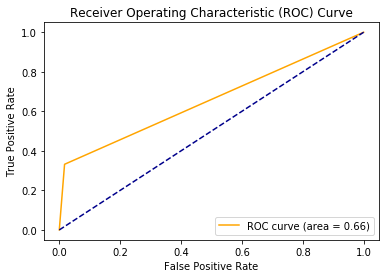

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.93           0.93       0.57    0.21   
1                       KNN            0.94           0.93       0.49    0.20   
2              NAVIES BAYES            0.08           0.08       0.07    1.00   
3     DECISION TREE ENTROPY            1.00           0.91       0.40    0.43   
4        DECISION TREE GINI            1.00           0.91       0.40    0.45   
5             RANDOM FOREST            0.99           0.93       0.55    0.27   
6        BAGGING CLASSIFIER            0.99           0.93       0.52    0.33   
7       ADABOOST CLASSIFIER            0.93           0.93       0.52    0.24   
8  GRADIENTBOOST CLASSIFIER            0.94           0.94       0.60    0.33   

   roc_ac  f1-score  
0    0.60      0.30  
1    0.59      0.28  
2    0.51      0.13

cross validation scores

ACCURACY SCORE: LR : 0.9206406476246463
BIAS ERROR OF LR : 0.07935935237535374
VARIANCE ERROR OF LR : 1.8814727713692745e-05
CV Score : Mean - 0.9206406 | Std - 0.003879663 | Min - 0.9153011 | Max - 0.9270788
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.7859714834349745
BIAS ERROR OF KNN : 0.21402851656502553
VARIANCE ERROR OF KNN : 0.00016407382172090347
CV Score : Mean - 0.7859715 | Std - 0.01145683 | Min - 0.7642742 | Max - 0.7960482
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.6963350027628598
BIAS ERROR OF CART1 : 0.30366499723714024
VARIANCE ERROR OF CART1 : 8.029335879018311e-05
CV Score : Mean - 0.696335 | Std - 0.008014655 | Min - 0.6849943 | Max - 0.7079328
------------------------------------------------------------------------------------------------------------

ACCURACY 

In [24]:
model_results(X,y)

### FROM THE ABOVE RESULTS THE BEST MODEL IS GRADIENTBOOST CLASSIFIER BECAUSE IT HAS GOOD GENERALIZATION IN TERMS OF TRAIN AND TEST ACCURACY. AND THE MODEL ALSO HAVE LOW BIAS AND LOW VARIANCE(GOOD BIAS AND VARIANCE TRADE OFF) AND THE MODEL HAS GOT LOW RECALL SCORE DUE TO DATA IMBALANCE IN TARGET COLUMN.SO FURTHER DATA IMBALANCE CAN BE SOLVED USING OVER SAMPLING TECHNIQUES.

# TARGET CLASS DATA IMBALANCE IS SOLVED USING SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

# after balancing using SMOTE

In [25]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(X_Train, y_Train)

In [27]:
result_0=(pd.Series(y_smote).value_counts()[0]/len(y_smote))*100
result_1=(pd.Series(y_smote).value_counts()[1]/len(y_smote))*100

labels = ['0-no','1-yes']
values = [result_0,result_1]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

In [28]:
X_smote=pd.DataFrame(X_smote,columns=X_Train.columns)
y_smote=pd.DataFrame(y_smote,columns=['y'])

In [29]:
df_smote=pd.concat([X_smote,y_smote],axis=1)

In [30]:
df_smote.head()

age  contact     month  day_of_week  duration  campaign     pdays  \
0  1.915498 -1.26515  0.252005     0.724502 -0.674189 -0.570906  0.023808   
1 -0.596703  0.79042  0.766183    -0.696593  0.212203 -0.215853  0.023808   
2 -0.701379  0.79042 -0.776351     1.435050 -0.786023  2.979618  0.023808   
3 -0.806054 -1.26515 -0.262173     1.435050 -0.115017 -0.570906  0.023808   
4 -0.387353  0.79042  0.252005    -1.407141 -0.798449  2.624566  0.023808   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.290181      0.769362        0.566862      -0.460806   0.694245   
1 -0.290181     -1.365360        0.766980       0.580968  -1.833621   
2 -0.290181     -1.434222       -1.314983      -1.289491  -1.608095   
3 -0.290181      0.769362        1.571125      -0.247716   0.694865   
4 -0.290181      0.769362        0.566862      -0.460806   0.690528   

   nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0     0.805765        -0.556026         -0.192232      -0.160683   
1    -3.027916         1.798478         -0.192232      -0.160683   
2    -1.285334        -0.556026         -0.192232      -0.160683   
3     0.805765        -0.556026         -0.192232      -0.160683   
4     0.805765         1.798478         -0.192232      -0.160683   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
1       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
2       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
3       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
4       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   

   job_technician  job_unemployed  job_unknown  marital_married  \
0        2.238278       -0.149086    -0.087554         0.786102   
1       -0.446772       -0.149086    -0.087554         0.786102   
2       -0.446772       -0.149086    -0.087554        -1.272099   
3       -0.446772        6.707557    -0.087554        -1.272099   
4       -0.446772       -0.149086    -0.087554        -1.272099   

   marital_single  marital_unknown  education_basic.6y  education_basic.9y  \
0       -0.606182        -0.041911            -0.24357           -0.418645   
1       -0.606182        -0.041911            -0.24357            2.388657   
2        1.649671        -0.041911            -0.24357           -0.418645   
3        1.649671        -0.041911            -0.24357           -0.418645   
4        1.649671        -0.041911            -0.24357            2.388657   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.550661              -0.02078                      -0.380495   
1              -0.550661              -0.02078                      -0.380495   
2               1.816000              -0.02078                      -0.380495   
3               1.816000              -0.02078                      -0.380495   
4              -0.550661              -0.02078                      -0.380495   

   education_university.degree  education_unknown  default_unknown  \
0                     1.540148          -0.192985        -0.524017   
1                    -0.649288          -0.192985        -0.524017   
2                    -0.649288          -0.192985        -0.524017   
3                    -0.649288          -0.192985         1.908336   
4                    -0.649288          -0.192985         1.908336   

   default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   
1    -0.008996        -0.088488     0.937959     -0.088488 -0.416552   
2    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   
3    -0.008996        -0.088488     0.937959     -0.088488 -0.416552   
4    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   

   poutcome_non

In [31]:
X=df_smote.drop('y',axis=1)
y=df_smote['y']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8703248541561788 

accuracy test: 0.8761141435776963 

precision : 0.8681672025723473 

f1 score: 0.8784653968684335 

roc_auc_score 0.8760198957394078 



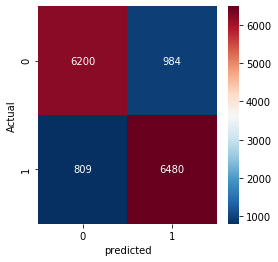

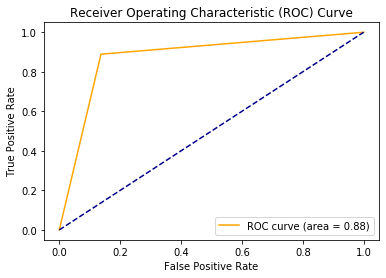

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.947259320678729 

accuracy test: 0.9328404615490914 

precision : 0.8838254951999028 

f1 score: 0.93736306225029 

roc_auc_score 0.9323657074256263 



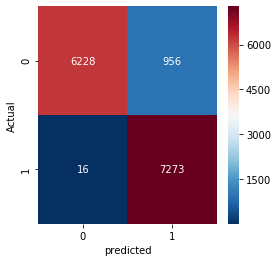

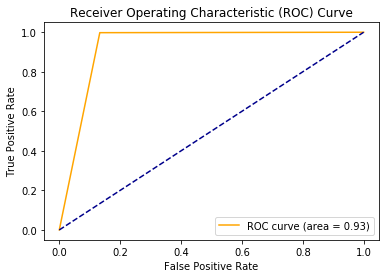

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.5072995943024667 

accuracy test: 0.5108132384439992 

precision : 0.5072837527009131 

f1 score: 0.6727676095396561 

roc_auc_score 0.5072493358818442 



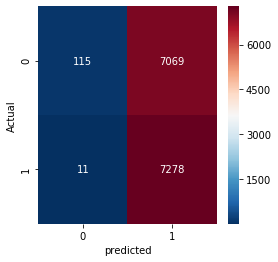

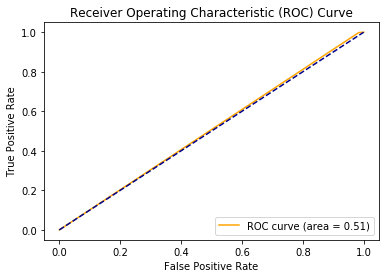

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9452083189387135 

precision : 0.9431105047748977 

f1 score: 0.9457555236336275 

roc_auc_score 0.9451848817405243 



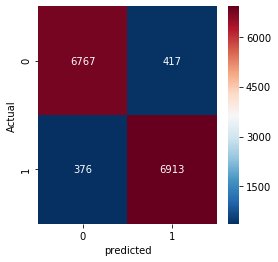

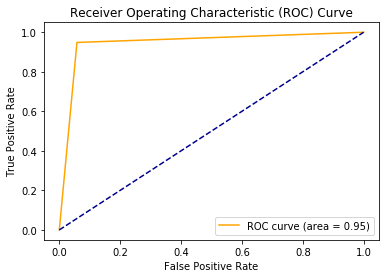

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9400953499619982 

precision : 0.9367519042437432 

f1 score: 0.9407827334198484 

roc_auc_score 0.9400606151044943 



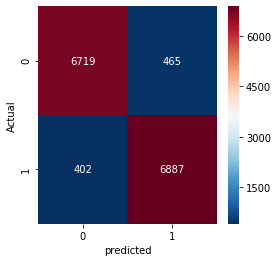

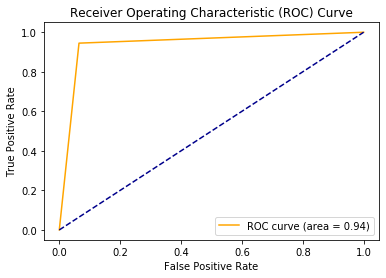

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.9985785779857266 

accuracy test: 0.9643474055137152 

precision : 0.9624470845281988 

f1 score: 0.9646865589926087 

roc_auc_score 0.9643284848022816 



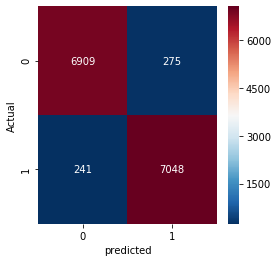

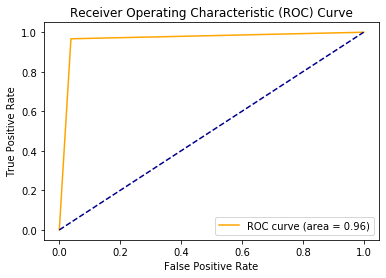

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9978086410613284 

accuracy test: 0.9552960685414219 

precision : 0.9484201998379692 

f1 score: 0.955971418849949 

roc_auc_score 0.9552350637580931 



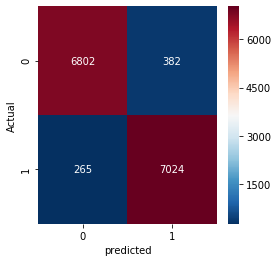

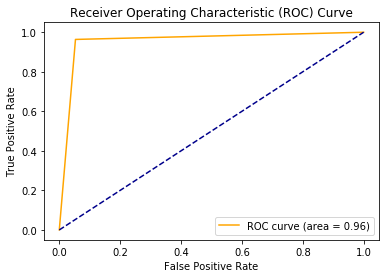

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.9297580621279872 

accuracy test: 0.9336004974780626 

precision : 0.9291915355398807 

f1 score: 0.9344519473432917 

roc_auc_score 0.9335553948180144 



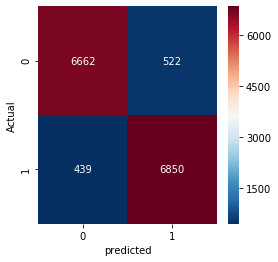

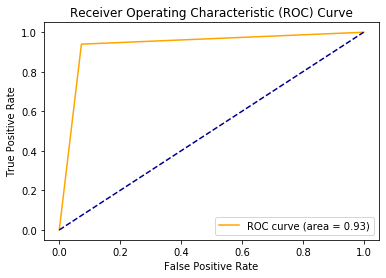

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.9503686813349522 

accuracy test: 0.9484557451806813 

precision : 0.9335984095427435 

f1 score: 0.9497101253876231 

roc_auc_score 0.9483247000773964 



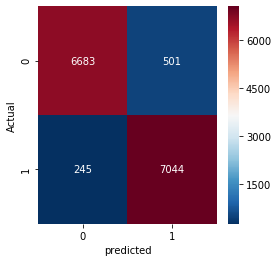

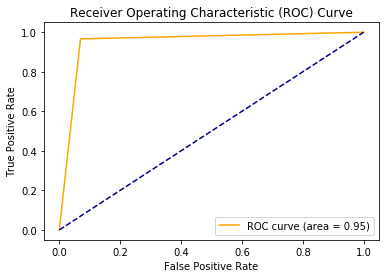

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.87           0.88       0.87    0.89   
1                       KNN            0.95           0.93       0.88    1.00   
2              NAVIES BAYES            0.51           0.51       0.51    1.00   
3     DECISION TREE ENTROPY            1.00           0.95       0.94    0.95   
4        DECISION TREE GINI            1.00           0.94       0.94    0.94   
5             RANDOM FOREST            1.00           0.96       0.96    0.97   
6        BAGGING CLASSIFIER            1.00           0.96       0.95    0.96   
7       ADABOOST CLASSIFIER            0.93           0.93       0.93    0.94   
8  GRADIENTBOOST CLASSIFIER            0.95           0.95       0.93    0.97   

   roc_ac  f1-score  
0    0.88      0.88  
1    0.93      0.94  
2    0.51      0.67

cross validation scores

ACCURACY SCORE: LR : 0.9347899143574121
BIAS ERROR OF LR : 0.0652100856425879
VARIANCE ERROR OF LR : 5.385596987806081e-06
CV Score : Mean - 0.9347899 | Std - 0.002075687 | Min - 0.9319988 | Max - 0.9372335
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.9734381286359166
BIAS ERROR OF KNN : 0.02656187136408339
VARIANCE ERROR OF KNN : 3.86028271323065e-06
CV Score : Mean - 0.9734381 | Std - 0.001757335 | Min - 0.9706793 | Max - 0.9751559
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.9442237353176083
BIAS ERROR OF CART1 : 0.05577626468239172
VARIANCE ERROR OF CART1 : 5.529367030981324e-06
CV Score : Mean - 0.9442237 | Std - 0.00210321 | Min - 0.940846 | Max - 0.9468802
------------------------------------------------------------------------------------------------------------

ACCURACY SCOR

In [32]:
model_results(X,y)

# CHOOSING BEST MODEL AFTER  SMOTE: RANDOM FOREST CLASSIFIER

# RANDOM FOREST MODEL HAS GOOD GENERALIZATION IN TERMS OF TRAIN AND TEST ACCURACY

In [33]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred=rf.predict(X_Test)

In [35]:
#METRICS
print("accuracy:",accuracy_score(y_Test,y_pred),"\n")
#precision
print("precision :",precision_score(y_Test,y_pred),"\n")
#Recall
print("Recall :",recall_score(y_Test,y_pred),"\n")
print("f1 score:",f1_score(y_Test,y_pred),"\n")
#roc_auc score
print("roc_auc_score",roc_auc_score(y_Test,y_pred),"\n")

accuracy: 0.930042262386476 

precision : 0.5121951219512195 

Recall : 0.4490566037735849 

f1 score: 0.4785522788203754 

roc_auc_score 0.708065005353769 



# RANDOM OVER SAMPLING

In [36]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_Train, y_Train)

# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 24121), (1, 24121)]


In [38]:
result_0=(pd.Series(y_resampled).value_counts()[0]/len(y_resampled))*100
result_1=(pd.Series(y_resampled).value_counts()[1]/len(y_resampled))*100
labels = ['0-no','1-yes']
values = [result_0,result_1]
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

In [39]:
X_over=pd.DataFrame(X_resampled,columns=X_Train.columns)
y_over=pd.DataFrame(y_resampled,columns=['y'])

In [40]:
df_over=pd.concat([X_over,y_over],axis=1)

In [41]:
df_over.head()

age  contact     month  day_of_week  duration  campaign     pdays  \
0  1.915498 -1.26515  0.252005     0.724502 -0.674189 -0.570906  0.023808   
1 -0.596703  0.79042  0.766183    -0.696593  0.212203 -0.215853  0.023808   
2 -0.701379  0.79042 -0.776351     1.435050 -0.786023  2.979618  0.023808   
3 -0.806054 -1.26515 -0.262173     1.435050 -0.115017 -0.570906  0.023808   
4 -0.387353  0.79042  0.252005    -1.407141 -0.798449  2.624566  0.023808   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.290181      0.769362        0.566862      -0.460806   0.694245   
1 -0.290181     -1.365360        0.766980       0.580968  -1.833621   
2 -0.290181     -1.434222       -1.314983      -1.289491  -1.608095   
3 -0.290181      0.769362        1.571125      -0.247716   0.694865   
4 -0.290181      0.769362        0.566862      -0.460806   0.690528   

   nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0     0.805765        -0.556026         -0.192232      -0.160683   
1    -3.027916         1.798478         -0.192232      -0.160683   
2    -1.285334        -0.556026         -0.192232      -0.160683   
3     0.805765        -0.556026         -0.192232      -0.160683   
4     0.805765         1.798478         -0.192232      -0.160683   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
1       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
2       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
3       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   
4       -0.272424    -0.174467            -0.1865     -0.329679     -0.11271   

   job_technician  job_unemployed  job_unknown  marital_married  \
0        2.238278       -0.149086    -0.087554         0.786102   
1       -0.446772       -0.149086    -0.087554         0.786102   
2       -0.446772       -0.149086    -0.087554        -1.272099   
3       -0.446772        6.707557    -0.087554        -1.272099   
4       -0.446772       -0.149086    -0.087554        -1.272099   

   marital_single  marital_unknown  education_basic.6y  education_basic.9y  \
0       -0.606182        -0.041911            -0.24357           -0.418645   
1       -0.606182        -0.041911            -0.24357            2.388657   
2        1.649671        -0.041911            -0.24357           -0.418645   
3        1.649671        -0.041911            -0.24357           -0.418645   
4        1.649671        -0.041911            -0.24357            2.388657   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.550661              -0.02078                      -0.380495   
1              -0.550661              -0.02078                      -0.380495   
2               1.816000              -0.02078                      -0.380495   
3               1.816000              -0.02078                      -0.380495   
4              -0.550661              -0.02078                      -0.380495   

   education_university.degree  education_unknown  default_unknown  \
0                     1.540148          -0.192985        -0.524017   
1                    -0.649288          -0.192985        -0.524017   
2                    -0.649288          -0.192985        -0.524017   
3                    -0.649288          -0.192985         1.908336   
4                    -0.649288          -0.192985         1.908336   

   default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   
1    -0.008996        -0.088488     0.937959     -0.088488 -0.416552   
2    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   
3    -0.008996        -0.088488     0.937959     -0.088488 -0.416552   
4    -0.008996        -0.088488    -1.066145     -0.088488 -0.416552   

   poutcome_non

In [42]:
X=df_smote.drop('y',axis=1)
y=df_smote['y']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8703248541561788 

accuracy test: 0.8761141435776963 

precision : 0.8681672025723473 

f1 score: 0.8784653968684335 

roc_auc_score 0.8760198957394078 



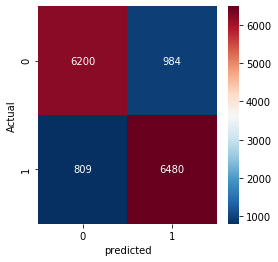

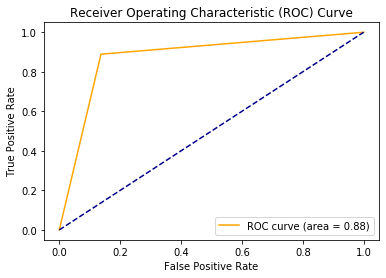

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.947259320678729 

accuracy test: 0.9328404615490914 

precision : 0.8838254951999028 

f1 score: 0.93736306225029 

roc_auc_score 0.9323657074256263 



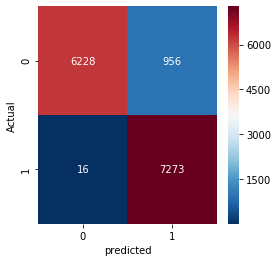

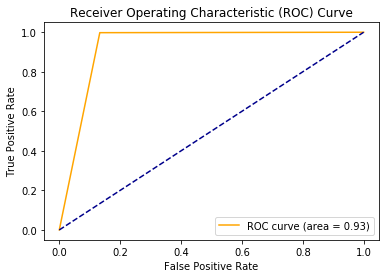

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.5072995943024667 

accuracy test: 0.5108132384439992 

precision : 0.5072837527009131 

f1 score: 0.6727676095396561 

roc_auc_score 0.5072493358818442 



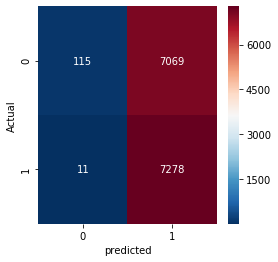

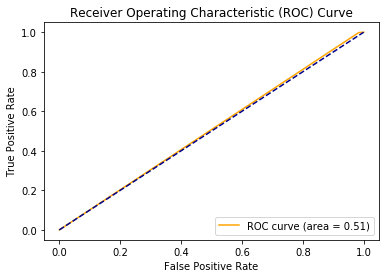

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9452083189387135 

precision : 0.9431105047748977 

f1 score: 0.9457555236336275 

roc_auc_score 0.9451848817405243 



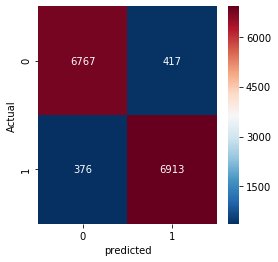

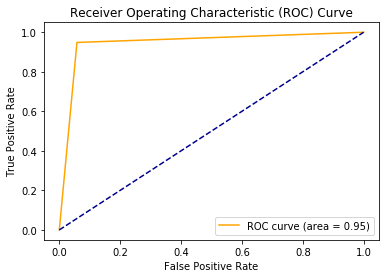

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9400953499619982 

precision : 0.9367519042437432 

f1 score: 0.9407827334198484 

roc_auc_score 0.9400606151044943 



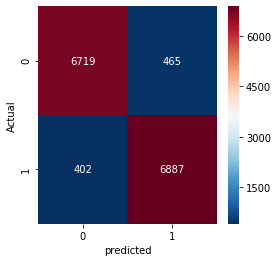

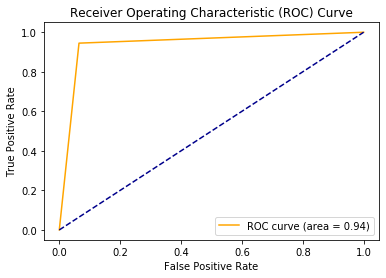

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.9985785779857266 

accuracy test: 0.9643474055137152 

precision : 0.9624470845281988 

f1 score: 0.9646865589926087 

roc_auc_score 0.9643284848022816 



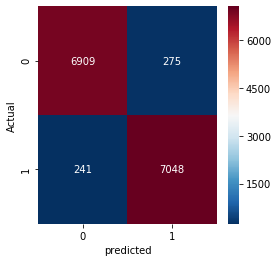

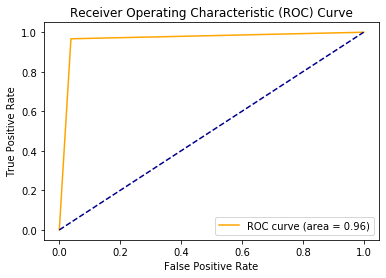

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9978086410613284 

accuracy test: 0.9552960685414219 

precision : 0.9484201998379692 

f1 score: 0.955971418849949 

roc_auc_score 0.9552350637580931 



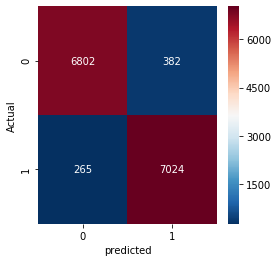

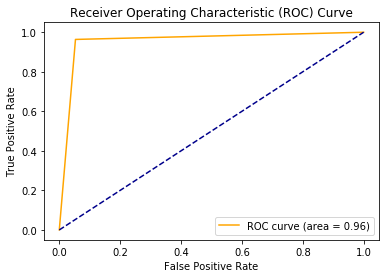

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.9297580621279872 

accuracy test: 0.9336004974780626 

precision : 0.9291915355398807 

f1 score: 0.9344519473432917 

roc_auc_score 0.9335553948180144 



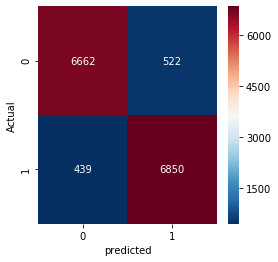

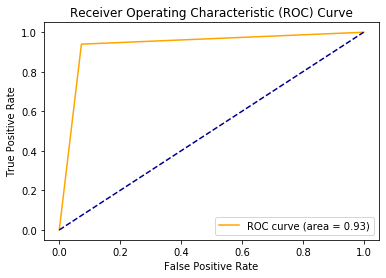

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.9503686813349522 

accuracy test: 0.9484557451806813 

precision : 0.9335984095427435 

f1 score: 0.9497101253876231 

roc_auc_score 0.9483247000773964 



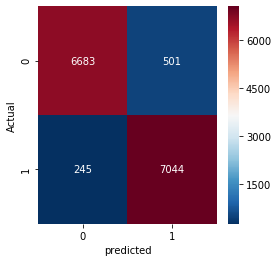

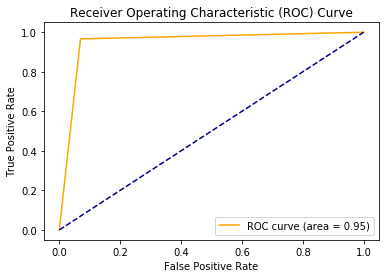

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.87           0.88       0.87    0.89   
1                       KNN            0.95           0.93       0.88    1.00   
2              NAVIES BAYES            0.51           0.51       0.51    1.00   
3     DECISION TREE ENTROPY            1.00           0.95       0.94    0.95   
4        DECISION TREE GINI            1.00           0.94       0.94    0.94   
5             RANDOM FOREST            1.00           0.96       0.96    0.97   
6        BAGGING CLASSIFIER            1.00           0.96       0.95    0.96   
7       ADABOOST CLASSIFIER            0.93           0.93       0.93    0.94   
8  GRADIENTBOOST CLASSIFIER            0.95           0.95       0.93    0.97   

   roc_ac  f1-score  
0    0.88      0.88  
1    0.93      0.94  
2    0.51      0.67

cross validation scores

ACCURACY SCORE: LR : 0.9347899143574121
BIAS ERROR OF LR : 0.0652100856425879
VARIANCE ERROR OF LR : 5.385596987806081e-06
CV Score : Mean - 0.9347899 | Std - 0.002075687 | Min - 0.9319988 | Max - 0.9372335
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.9734381286359166
BIAS ERROR OF KNN : 0.02656187136408339
VARIANCE ERROR OF KNN : 3.86028271323065e-06
CV Score : Mean - 0.9734381 | Std - 0.001757335 | Min - 0.9706793 | Max - 0.9751559
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.9442237353176083
BIAS ERROR OF CART1 : 0.05577626468239172
VARIANCE ERROR OF CART1 : 5.529367030981324e-06
CV Score : Mean - 0.9442237 | Std - 0.00210321 | Min - 0.940846 | Max - 0.9468802
------------------------------------------------------------------------------------------------------------

ACCURACY SCOR

In [43]:
model_results(X,y)

# CHOOSING BEST MODEL AFTER RANDOM OVER SAMPLING: RANDOM FOREST CLASSIFIER

# RANDOM FOREST MODEL HAS GOOD GENERALIZATION INTERMS OF TRAIN AND TEST ACCURACY

In [44]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred=rf.predict(X_Test)

In [46]:
#METRICS
print("accuracy:",accuracy_score(y_Test,y_pred),"\n")
#precision
print("precision :",precision_score(y_Test,y_pred),"\n")
#Recall
print("Recall :",recall_score(y_Test,y_pred),"\n")
print("f1 score:",f1_score(y_Test,y_pred),"\n")
#roc_auc score
print("roc_auc_score",roc_auc_score(y_Test,y_pred),"\n")

accuracy: 0.9286035428468663 

precision : 0.5006934812760055 

Recall : 0.4540880503144654 

f1 score: 0.4762532981530343 

roc_auc_score 0.7096122994163844 



# Final Model

# Light GBM model without Balancing 

In [47]:
def modelfit(model,X,y,predictors,performCV=True, printFeatureImportance=True, cv_folds=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    #Fit the algorithm on the data
    model.fit(X_train,y_train)
    
    #Predict training set:
    y_pred = model.predict(X_test)
    #dtrain_predprob = model.predict_proba(X_test)[:,1]
    
    print("accuracy train:",model.score(X_train,y_train),"\n")
    #test
    print("accuracy test:",model.score(X_test,y_test),"\n")
    #precision
    print("precision :",precision_score(y_test,y_pred),"\n")
    #Recall
    print("Recall :",recall_score(y_test,y_pred),"\n")
    #f1 score
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    #roc_auc score
    print("roc_auc_score",roc_auc_score(y_test,y_pred),"\n")
    #CONFUSION MATRIX
    fig,ax= plt.subplots()
    fig.set_size_inches(4, 4)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap = 'RdBu_r')
    bottom, top = ax.get_ylim()
    ax.set_xlabel("predicted")
    ax.set_ylabel("Actual")
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    #roc auc curve
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plot_roc_curve(fpr, tpr,roc_auc)
    print("-------------------------------------------------------------------------------------------------------")
    
    #Perform cross-validation:
    if performCV:
        kf  = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
        cv_results =model_selection.cross_val_score(model,X,y,cv=kf,scoring='roc_auc')
        
    if performCV:
        print('BIAS ERROR :',1-np.mean(cv_results))
        print('VARIANCE ERROR OF :',np.var(cv_results,ddof=1))
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_results),np.std(cv_results),np.min(cv_results),np.max(cv_results)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
        fig,ax= plt.subplots()
        fig.set_size_inches(11.7, 8.27)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')    

In [48]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.9594573762910437 

accuracy test: 0.9375955399694272 

precision : 0.6024340770791075 

Recall : 0.37358490566037733 

f1 score: 0.4611801242236025 

roc_auc_score 0.6773018465935046 



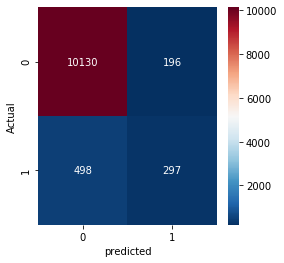

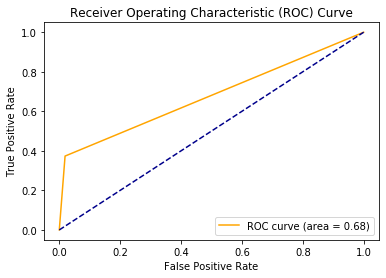

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.05220109843880716
VARIANCE ERROR OF : 1.3196935939921792e-05
CV Score : Mean - 0.9477989 | Std - 0.003249238 | Min - 0.9417295 | Max - 0.9507323


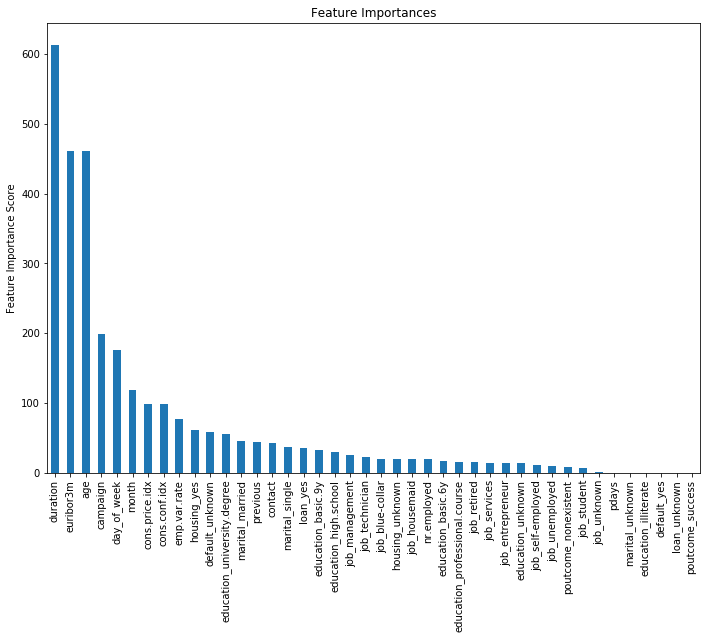

In [49]:
model = lgb.LGBMClassifier(random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# Here we need to Reduce the Type ii error i.e we need to reduce the False negative value lets us see what happens after balancing 

# after balancing using scale_pos_weight parameter

In [50]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

In [51]:
number_of_positive_samples=df_final_1.y.value_counts()[1]#4640
total_samples=df.shape[0]#41188

In [52]:
scale_pos_weight = 100 - ( number_of_positive_samples / total_samples  * 100 )
scale_pos_weight

93.63406817519666

accuracy train: 0.853823030676738 

accuracy test: 0.8388634115637083 

precision : 0.2995577000402091 

Recall : 0.9371069182389937 

f1 score: 0.45399146861669715 

roc_auc_score 0.8842032751179474 



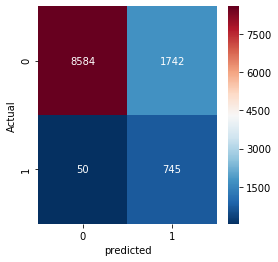

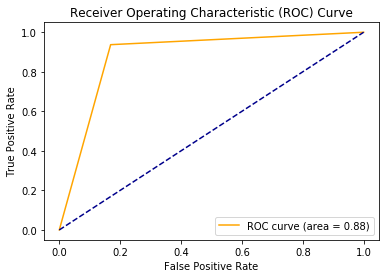

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.05613219986976614
VARIANCE ERROR OF : 1.1956290278384592e-05
CV Score : Mean - 0.9438678 | Std - 0.003092739 | Min - 0.9390147 | Max - 0.9467511


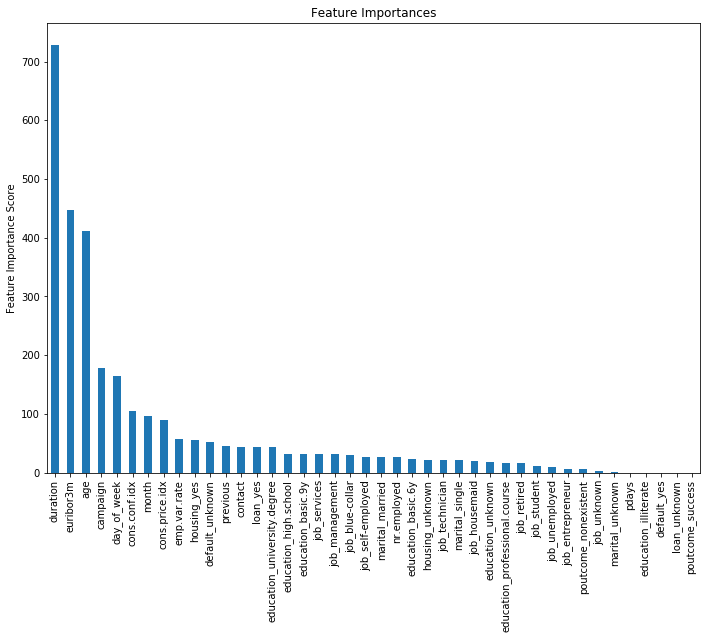

In [53]:
model = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# after balancing using class_weight parameter

In [54]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.8954447356250963 

accuracy test: 0.8819350777807751 

precision : 0.3666323377960865 

Recall : 0.8955974842767296 

f1 score: 0.5202776762879066 

roc_auc_score 0.888240345857133 



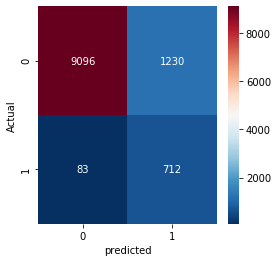

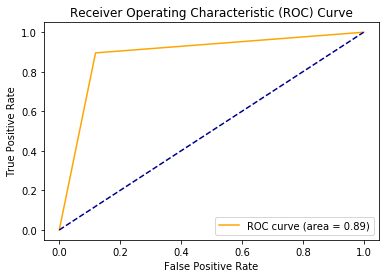

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.05281260486610928
VARIANCE ERROR OF : 1.3582563179442097e-05
CV Score : Mean - 0.9471874 | Std - 0.003296369 | Min - 0.9428002 | Max - 0.9508479


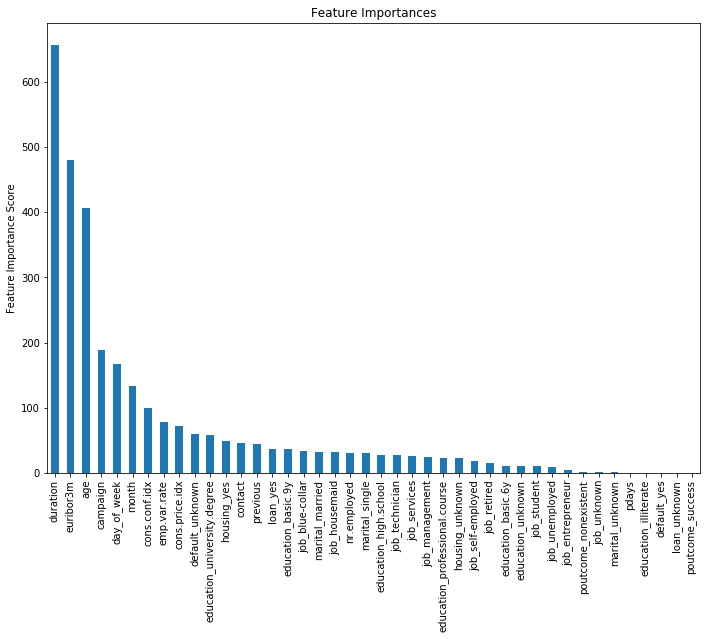

In [55]:
model = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

## precision -Recall tradeoff is better with the class_weight parameter, hence we will continue with the class_weight parameter

# using hyper parameter tuning 

In [56]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.8954447356250963 

accuracy test: 0.8819350777807751 

precision : 0.3666323377960865 

Recall : 0.8955974842767296 

f1 score: 0.5202776762879066 

roc_auc_score 0.888240345857133 



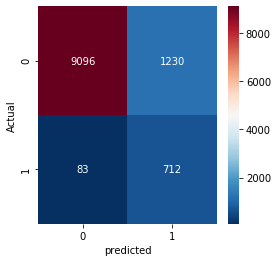

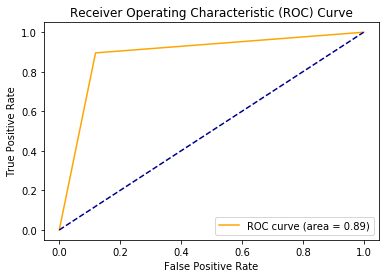

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.05281260486610928
VARIANCE ERROR OF : 1.3582563179442097e-05
CV Score : Mean - 0.9471874 | Std - 0.003296369 | Min - 0.9428002 | Max - 0.9508479


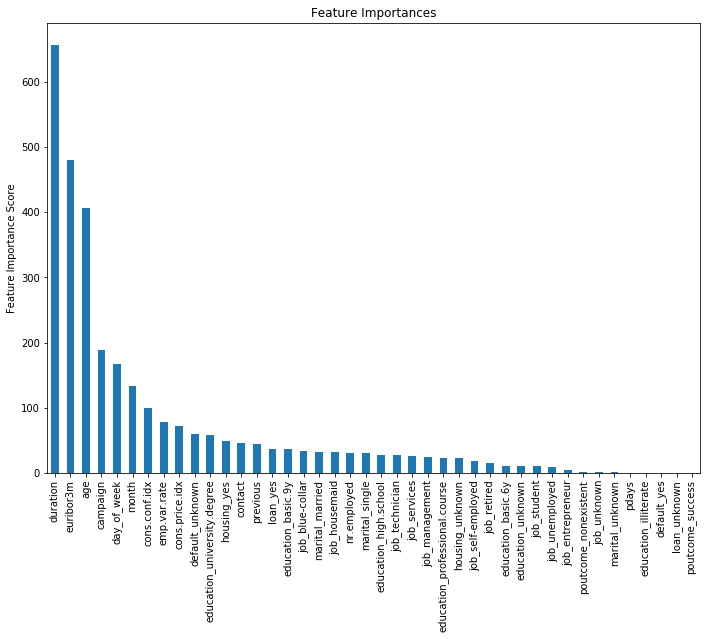

In [57]:
gbm0 = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42,
                          learning_rate=0.1,n_estimators=100,max_depth=9,min_split_gain=10)
predictors=X.columns
modelfit(model,X,y,predictors)

### hyper parameter tuning doesnt change much, hence we will fix with following parameter
### (class_weight='balanced',objective='binary',random_state=42)

# now using feature selection using VIF 

# FUNCTION FOR REMOVING COLUMN WITH VIF VALUE >=5

In [58]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
            print(maxloc)

    print('Remaining variables:')
    print(X.columns[variables])

In [59]:
continuous_attributes=['age','duration','campaign','pdays','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',]

In [60]:
df_num=df_final_1[continuous_attributes]
df_num.head()

age  duration  campaign  pdays  emp.var.rate  cons.price.idx  \
0   56       261         1    999           1.1          93.994   
1   57       149         1    999           1.1          93.994   
2   37       226         1    999           1.1          93.994   
3   40       151         1    999           1.1          93.994   
4   56       307         1    999           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [61]:
calculate_vif_(df_num,thresh=5.0)

dropping 'nr.employed' at index: 8
8
dropping 'cons.price.idx' at index: 5
5
dropping 'pdays' at index: 3
3
dropping 'euribor3m' at index: 5
5
dropping 'cons.conf.idx' at index: 4
4
Remaining variables:
Index(['age', 'duration', 'campaign', 'emp.var.rate'], dtype='object')


# MODEL BUILDING AFTER REMOVING REDUNDANT COLUMNS

In [62]:
X=df_final.drop(['nr.employed', 'cons.price.idx', 'euribor3m', 'cons.conf.idx'],axis=1)
y=df_final['y']

accuracy train: 1.0 

accuracy test: 1.0 

precision : 1.0 

Recall : 1.0 

f1 score: 1.0 

roc_auc_score 1.0 



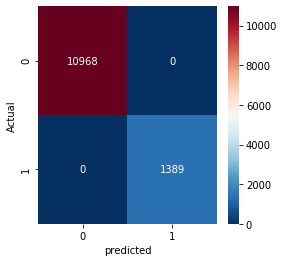

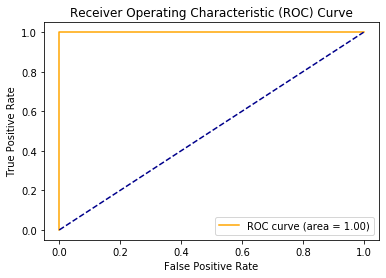

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.0
VARIANCE ERROR OF : 3.0814879110195774e-33
CV Score : Mean - 1 | Std - 4.965068e-17 | Min - 1 | Max - 1


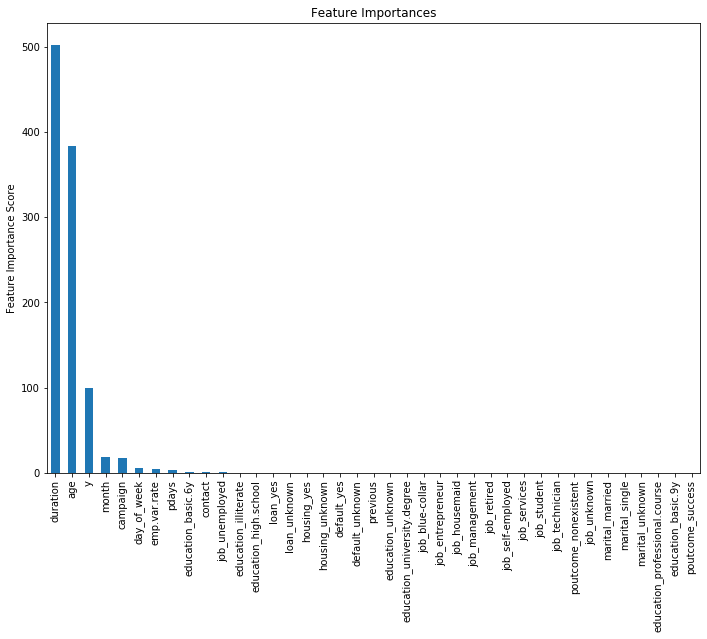

In [63]:
model = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# AFTER REMOVING REDUNDANT COLUMNS USING VIF NOW THE GRADIENT BOOST MODEL HAS GOT GOOD RECALL,PRECISION,ROC_AUC SCORE